<a href="https://colab.research.google.com/github/enaranjom/SySTalleres_EstebanN/blob/master/Taller3_EstebanNaranjoM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esteban Naranjo Morales
## Código: 817039
## Señales y Sistemas/ Taller 3

# 2. Modelado y simulación de sistemas en el tiempo

Estudiar y realizar los ejercicios propuestos (si es el caso)



#### 2.1
Respuesta en el tiempo de sistemas lineales e invariantes en el tiempo mediante ecuaciones diferenciales ordinarias: ver
cuadernos Respuesta al impulso, Respuesta al escalon. 

**Ejercicio**
## Respuesta al impulso
* Compare la señal de salida obtenida al resolver la EDO con la obtenida mediante la convolución. Son iguales?

La respuesta del sistema se calcula para la señal de entrada $x(t)=e^{-2t}\cdot\epsilon(t)$ cuando

Primero, se define la EDO en `SymPy`

\begin{equation}
\frac{d}{dt} y(t)+ y(t) = x(t)
\end{equation}

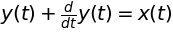

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t = sym.symbols('t', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(y + y.diff(t) , x)
ode

La EDO se resuelve para la señal de entrada dada con el fin de calcular la señal de salida. La constante de integración se calcula de forma que la solución cumpla las condiciones iniciales.

In [ ]:
solution = sym.dsolve(ode.subs(x, sym.exp(-2*t)*sym.Heaviside(t)))
integration_constants = sym.solve( (solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1' )
y1 = solution.subs(integration_constants)
y1

Se grafica la solución de la EDO 

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


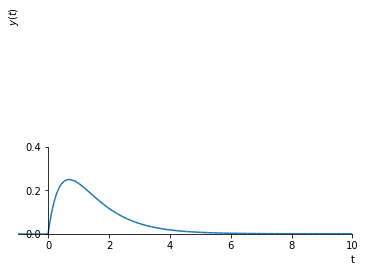

In [ ]:
sym.plot(y1.rhs, (t,-1,10), ylabel=r'$y(t)$');

La respuesta de impulso $h(t)$ se calcula resolviendo la EDO para un impulso de Dirac como señal de entrada, $x(t)=\delta(t)$

In [ ]:
h = sym.Function('h')(t)
solution2 = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))
integration_constants = sym.solve( (solution2.rhs.limit(t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1' )
h = solution2.subs(integration_constants)
h

Como alternativa a la solución explícita de la EDO, la respuesta del sistema se calcula evaluando la convolución $y(t)=x(t)*h(t)$. Dado que `SymPy` no puede manejar la función Heaviside de manera adecuada en las integrales, la integral de convolución se simplifica primero. Tanto la señal de entrada $x(t)$ como la respuesta de impulso $h(t)$ son señales causales. Por lo tanto, la integral de convolución resulta en

\begin{equation}
y(t) = \int_{0}^{t} x(\tau) \cdot h(t - \tau) \; d\tau
\end{equation}

Para $t\geq0$. Observe que $y(t)=0$ para $t<0$.

In [ ]:
tau = sym.symbols('tau', real=True)

y2 = sym.integrate(sym.exp(-2*tau) * h.rhs.subs(sym.Heaviside(t), 1).subs(t, t-tau), (tau, 0, t))
y2

Se grafica la señal de salida obtenida mediante el proceso de convolución

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


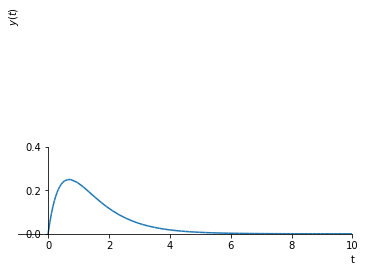

In [ ]:
sym.plot(y2, (t,-1,10), ylabel=r'$y(t)$');

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


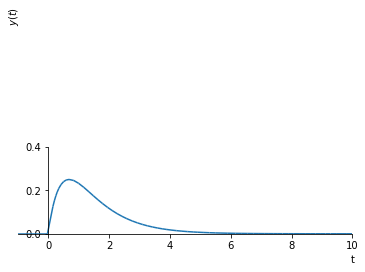

In [ ]:
sym.plot(y1.rhs, (t,-1,10), ylabel=r'$y(t)$');

Se puede observar que la señal de salida de la ecuación diferencial y la señal de salida de la convolución si son iguales

* Compruebe la solución $h(t)$ de la EDO cuando $x(t)=\delta(t)$ de manera manual. Tener en cuenta que $\frac{d}{dt} \epsilon(t) = \delta(t)$.


* Comprobar la solución de la integral de convolución de manera manual. Tener en cuenta las funciones Heaviside.


###2.2
 Relaciones entre respuesta al impulso, funcion de transferencia y autofunciones: ver cuadernos Autofunciones.


Se considera un SLTI cuya relación entrada/salida viene dada por la siguiente ecuación diferencial ordinaria (EDO) con coeficientes constantes

\begin{equation}
a_0 y(t) + a_1 \frac{d y(t)}{dt} + a_2 \frac{d^2 y(t)}{dt^2} = x(t)
\end{equation}

Con $a_i \in \mathbb{R} \quad \forall i$. En el resto, la señal de salida $y(t)$ del sistema se calcula mediante la solución explícita de la EDO para $x(t)=e^{st}$ como señal de entrada. Las constantes de integración se descartan para facilitar la ilustración.

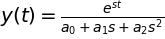

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, s, a0, a1, a2 = sym.symbols('t s a:3')
x = sym.exp(s * t)
y = sym.Function('y')(t)

ode = sym.Eq(a0*y + a1*y.diff(t) + a2*y.diff(t,2), x)
solution = sym.dsolve(ode)
solution.subs({'C1': 0, 'C2' : 0})

**Ejercicios**

* Introduzca $x(t)=e^{s t} $ y $y(t)=\lambda \cdot e^{st}$ en la EDO y calcule manualmente el valor propio $\lambda$. ¿Cómo se relaciona el resultado con el resultado anterior al resolver la EDO?
* Puede generalizar sus resultados a una EDO de orden arbitrario?

\begin{equation}
a_0 y(t) + a_1 \frac{d y(t)}{dt} + a_2 \frac{d^2 y(t)}{dt^2} = x(t)
\end{equation}

si:  $x(t)=e^{s t} $ y $y(t)=\lambda \cdot e^{st}$

In [ ]:
x = sym.exp(s * t)
y2 =sym.exp(s * t)
ode2 = sym.Eq(a0*y2 + a1*y2.diff(t) + a2*y2.diff(t,2), x)
solution = sym.dsolve(ode)
solution.subs({'C1': 0, 'C2' : 0})

#2.3
 Ejemplos de modelado de sistemas lineales e invariantes en
el tiempo mediante ecuaciones diferenciales ordinarias: ver
cuadernos Red eléctrica, Péndulo elástico

### péndulo elástico

**Ejercicio**

* Cambie el coeficiente de amortiguamiento $c$ del péndulo elástico e indique cómo cambia la magnitud y la fase de la función de transferencia $H(j\omega)$.

* Qué relación hay entre la frecuencia de oscilación y las frecuencias de resonancia?


**Ejercicio**

* Calcule y grafique el desplazamiento para valores dados de $m_\text{I}$ y $r$.

* ¿Para qué frecuencias angulares $\omega$ se tiene una mayor magnitud del desplazamiento? ¿Cómo es la relación de fase entre la fuerza externa $F_\text{E}(t)$ y el desplazamiento $y(t)$ en estas frecuencias?

* ¿Cómo deben elegirse las frecuencias de resonancia $\omega_0$ del péndulo de resorte para obtener un buen aislamiento de vibraciones para una máquina que gira con frecuencia angular $\omega$? ¿Cómo es la relación de fase entre la fuerza externa $F_\text{E}(t) $ y el desplazamiento $y(t)$ a esta frecuencia?

# 3. Transformada de Laplace 3.1)

Para resolver los siguientes ejercicios puede apoyarse de los cuadernos del repositorio github del curso, seccion 4: Transformada de Laplace.

1. Demuestre las siguientes propiedades (sin utilizar tablas de
propiedades):

#i) 
\begin{equation}
\mathcal{L} \ ({x(t−t_0)}) = e^{st_o} X(s)
\end{equation}

\begin{equation}
= \int_{0}^{\infty} x(t-t_0) \, e^{- s t} \; dt
\end{equation}
$t-t_0=t'\    $    $ t=t'+t_0 $

$dt=dt´$
\begin{equation}
= \int_{0}^{\infty} x(t') \, e^{- s (t'+t_0)}\; dt'
\end{equation}
\begin{equation}
= \int_{0}^{\infty} x(t') \, e^{- st'+st_0}\; dt' \; = e^{-st_0} \int_{0}^{\infty} x(t') \, e^{- st'} \; dt'
\end{equation}
$t'=t$
\begin{equation}
= e^{-st_0} X(s)
\end{equation}






#ii) 
\begin{equation}
\mathcal{L} \ ({x(at)}) = \frac{1}{|a|} X(\frac{s}{a})
\end{equation}
\begin{equation}
= \int_{0}^{\infty} x(at) \, e^{- s t} \; dt
\end{equation}
$at=t'\    $    $ \; t=t'/a $

$adt=dt´$
\begin{equation}
= \frac{1}{|a|} \int_{0}^{\infty} x(t') \, e^{-s \frac{ t'}{a}} \; dt' \;  \;  \;  \; a>=0
\end{equation}
\begin{equation}
= \frac{1}{|a|} X(\frac{s}{a})
\end{equation}


# iii) 
\begin{equation}
\mathcal{L} (\frac {d_xt}{t}) = s X(s)
\end{equation}

\begin{equation}
= \int_{0}^{\infty} x'(t) \, e^{- s t} \; dt
\end{equation}

$u=e^{-st}\ $    $ \;du=-s\ e^{-st} dt$

$dv=x'(t) \ $    $ v=x(t)$ 

\begin{equation}
= e^{-st} x(t) \Big|_{0}^{\infty} - \int_{0}^{\infty} x(t) (-s\ e^{-st}) \; dt
\end{equation}

\begin{equation}
= s\int_{0}^{\infty} x(t) \ e^{-st} \; dt + \lim_{t-> \infty} e^{-st} x(t) \, \ -\ \ x(0)
\end{equation}

\begin{equation}
= s X(s)
\end{equation}




#iv)
\begin{equation}
\mathcal{L} \ (x(t) *  y(t)) =  X(s) Y(s)
\end{equation}

\begin{equation}
= \int_{0}^{\infty} x(t) *  y(t) \, e^{- s t} \; dt
\end{equation}

\begin{equation}
= \int_{0}^{\infty} \Big(\int_{0}^{\infty} x(\tau)  y(t-\tau) d\tau \Big)\, e^{- s t} \; dt
\end{equation}

\begin{equation}
= \int_{0}^{\infty} \int_{0}^{\infty} x(\tau)  y(t-\tau)  \, e^{- s t} \; d\tau dt
\end{equation}

\begin{equation}
= \int_{0}^{\infty} x(\tau) \int_{0}^{\infty}   y(t-\tau)  \, e^{- s t} \; d\tau dt
\end{equation}

$ v=t- \tau \ \ \ \ \ t=v + \tau \\ dt=dv  $

\begin{equation}
= \int_{0}^{\infty} x(\tau) \int_{0}^{\infty}   y(v)  \, e^{- s(v + \tau )} \; dv \ d\tau 
\end{equation}

\begin{equation}
= \int_{0}^{\infty} x(\tau) \ e^{- s\tau } \int_{0}^{\infty}   y(v)  \, e^{- sv} \; dv \ d\tau \\
= \int_{0}^{\infty} x(\tau) \ e^{- s\tau } \ d\tau \int_{0}^{\infty}   y(v)  \, e^{- sv} \; dv \  
\end{equation}

$ \tau=t \ \ \ \ \ \ \ v=t $

\begin{equation}
\mathcal{L} \ (x(t)) \mathcal{L} \ (  y(t)) =  X(s) Y(s)
\end{equation}









# 3.5 
Consulte en que consiste un sistema subamortiguado, sobreamortiguado, y de amortiguamiento crıtico. Genere simulaciones para ejemplificar cada uno de los casos con los sistemas R,L,C serie y paralelo estudiados. Nota: asuma condiciones iniciales cero.

## Solución

Estos términos describen el impacto del elemento disipador (R) sobre la respuesta a través del análisis de la frecuencia neper en comparación con la frecuencia resonante.  Así, existen tres tipos de amortiguamiento:

La ecuación característica del circuito RLC es:

\begin{equation}
s^{2}+ \frac{R}{L}s + \frac{1}{LC}=0
\end{equation}

Vamos a encontrar las raíces de la ecuación característica mediante el uso de la fórmula cuadrática:

\begin{equation}
s= \frac{-R \pm \sqrt{R^{2}-4L/C}}{2L}
\end{equation}

Al sustituir las variables $ \alpha \ y \ \omega_o $ podemos escribir s de manera un poco más sencilla como:

\begin{equation}
s= - \alpha \  \pm \ \sqrt{\alpha ^{2} - \omega_o ^{2}}
\end{equation}

donde:

$ \alpha= \frac{R}{2L} \ \ , \ \omega_{o}=\frac{1}{\sqrt{LC}}$

$\alpha$ se llama el factor de amortiguamiento y $\omega_o $ es la frecuencia de resonancia.

Dependiendo del tamaño relativo de $\alpha \ y \ \omega_{0}$ habrá tres formas diferentes para la solución para i(t)

* sobreamortiguado, $\alpha > \omega_{0}$ 	​conduce a la suma de dos exponenciales decrecientes.
* críticamente amortiguado, $\alpha = \omega_{0}$ nos da t multiplicado por una exponencial decreciente.
* subamortiguado, $\alpha < \omega_{0}$ , conduce a un seno decreciente.

Serie: 

\begin{equation}
Y(s) = \frac{1}{LC s^2 + RC s + 1} \cdot X(s)
\end{equation}




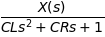

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = 1/(L*C*s**2 + R*C*s + 1) * X
Y

#1)  $x(t)=u(t)$
##circuito RLC serie (entrada tension de alimentacion - salida tension en el capacitor)

$\zeta= \frac{R}{2} \sqrt{ \frac{C}{L}} $

\begin{equation}
Y(s) = \frac{1}{LC s^2 + RC s + 1} \cdot \frac{1}{s}
\end{equation}

### Subamortiguado 
$ 0< \zeta < 1$

La señal de salida $y(t)$ es calculada mediante la transformada inversa de Laplace de $Y(s)$ para los siguientes valores:  $L = 0.5$, $R = 1$, $C = 0.4$.

In [2]:
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1/s), s, t)
y

El resultado se simplifica para facilitar la visualización.


In [3]:
y = y.simplify()
y

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


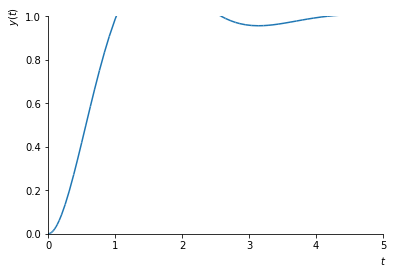

In [4]:
sym.plot(y, (t, 0, 5), xlabel='$t \ \ $', ylabel='$y(t) \ \ \  $');


## Sobreamortiguado
$\zeta>1$

La señal de salida  y(t)  es calculada mediante la transformada inversa de Laplace de  Y(s)  para los siguientes valores:  L=0.5 ,  R=10 ,  C=0.4 .

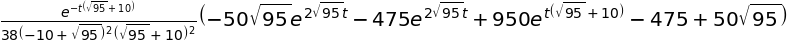

In [5]:
RLC = {R: 10, L: sym.Rational('.5'), C: sym.Rational('.4')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1/s), s, t)
y

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


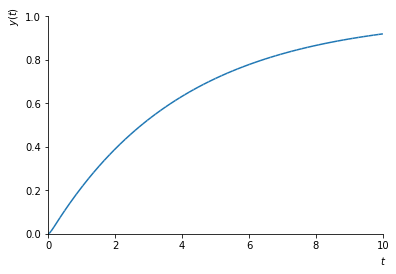

In [6]:
sym.plot(y, (t, 0, 10), xlabel='$t$', ylabel='$y(t)$');

##Amortiguamiento crítico

$\zeta=1$

La señal de salida $y(t)$ es calculada mediante la transformada inversa de Laplace de $Y(s)$ para los siguientes valores:  $L = 0.5$, $R = 2.236067977\ \ $, $C = 0.4$.

In [7]:
RLC = {R: 2.236067977, L: sym.Rational('.5'), C: sym.Rational('.4')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1/s), s, t)
y

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


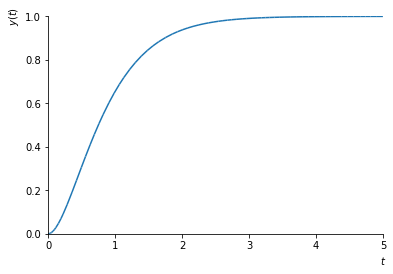

In [8]:
sym.plot(y, (t, 0,5), xlabel='$t$', ylabel='$y(t)$');

#2) x(t)= $\delta(t)$
$X(s)=1$

\begin{equation}
Y(s) = \frac{1}{LC s^2 + RC s + 1} \cdot 1
\end{equation}

### Subamortiguado 
$ 0< \zeta < 1$

La señal de salida $y(t)$ es calculada mediante la transformada inversa de Laplace de $Y(s)$ para los siguientes valores:  $L = 0.5$, $R = 1$, $C = 0.4$.

In [9]:
RLC = {R: sym.Rational('1.5') ,  L: sym.Rational('1'), C: sym.Rational('.1')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1), s, t)
y

In [10]:
y = y.simplify()
y

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


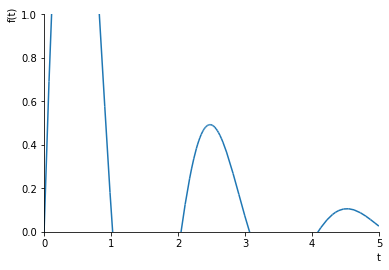

In [11]:
sym.plot(y, (t,0,5))

## Sobreamortiguado
$\zeta>1$

La señal de salida  y(t)  es calculada mediante la transformada inversa de Laplace de  Y(s)  para los siguientes valores:  L=0.5 ,  R=10 ,  C=0.4 .

In [12]:
RLC = {R: 10, L: sym.Rational('.5'), C: sym.Rational('.4')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1), s, t)
y

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


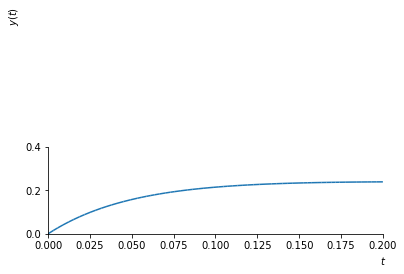

In [13]:
sym.plot(y, (t, 0, 0.2), xlabel='$t$', ylabel='$y(t)$');

##Amortiguamiento crítico

$\zeta=1$

La señal de salida $y(t)$ es calculada mediante la transformada inversa de Laplace de $Y(s)$ para los siguientes valores:  $L = 1$, $R = 2\ \ $, $C =1$.

In [14]:
RLC = {R: 2, L: sym.Rational('1'), C: sym.Rational('1')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1), s, t)
y

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


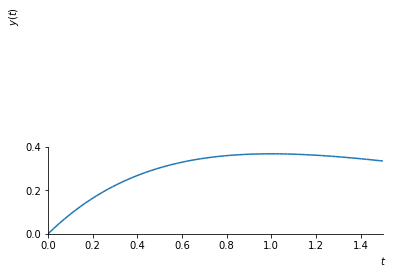

In [15]:
sym.plot(y, (t, 0, 1.5), xlabel='$t$', ylabel='$y(t)$');